In [1]:
pip install ucimlrepo

In [2]:
pip install category_encoders

**# Task:** In this assignment, your goal is to build a Decision-Tree Classifier model to predict the safety of the car (based on the data set provided).
You are required to build two models
(a) one with criterion gini index
(b) with criterion entropy

You will then compare the performance of both models and report your findings

Data set Link : https://archive.ics.uci.edu/dataset/19/car+evaluation

(Go to the link abve and read the data set information to familiarize yourself with the data)

# **# Task: Import Libraries**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree

# **# Task: Import Data Set**


In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [5]:
data_url = "https://archive.ics.uci.edu/static/public/19/data.csv"
df = pd.read_csv(data_url)


# Task: Perform Exploratory Data Analysis (e.g.,)
#(i) dimensions of the data set
# (ii) Top 5 rows of the data set

In [6]:
print(f"Dimensions of the data set: {df.shape}")
print("\nTop 5 rows of the data set :")
print(df.head())

Dimensions of the data set: (1728, 7)

Top 5 rows of the data set :
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


# **# Task: Rename the columns as follows: col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'] to give proper names and then display the data again**

In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
print("\nTop 5 rows of the data set (after renaming columns):")
print(df.head())


Top 5 rows of the data set (after renaming columns):
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


# **# Task: Provide a summary (info) of the data set**

In [8]:
print("\nData set summary (info):")
df.info()


Data set summary (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# **Task: Provide a summary of the variables (which are categorical, which are ordinal). Which is the target variable (label?)**

In [9]:
print("\nSummary of the variables:")
print("All features are 'object' (categorical) type.")
print("The columns 'buying', 'maint', 'doors', 'persons', 'lug_boot', and 'safety' are the feature variables.")
print("The column 'class' is the target variable (label).")



Summary of the variables:
All features are 'object' (categorical) type.
The columns 'buying', 'maint', 'doors', 'persons', 'lug_boot', and 'safety' are the feature variables.
The column 'class' is the target variable (label).


# **Task: What are the characteristics of the "target" variable. (categorical/ordinal). Any other information?**

In [10]:
label_value_counts = df['class'].value_counts()
print(label_value_counts)

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [11]:
print("\nCharacteristics of the Target Variable 'class':")
print("It is a categorical (specifically ordinal) variable.")
print("Value Counts (Distribution):")
print(label_value_counts)
print("Observation: The data is highly imbalanced, with 'unacc' being the majority class.")


Characteristics of the Target Variable 'class':
It is a categorical (specifically ordinal) variable.
Value Counts (Distribution):
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
Observation: The data is highly imbalanced, with 'unacc' being the majority class.


# **Task: Check for any missing values in the data**

In [12]:
print(df.isnull().sum())
print("No missing values found.")

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64
No missing values found.


# **Task: Declare feature vector and target variable (Data frames)**

In [13]:
X = df.drop(['class'], axis=1)
y = df['class']
print("Feature Vector (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())

Feature Vector (X):
  buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     2       2    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med

Target Variable (y):
0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object


# **Task: Split data into separate training and test set**
You can import "train_test_split" from sklearn.model_selection

# What is the shape of your train/test split? **bold text**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (1209, 6)
Shape of X_test: (519, 6)
Shape of y_train: (1209,)
Shape of y_test: (519,)


# **Task: Feature Engineering**
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

    Steps to do the feature engineering:
(i) check the data types of variables

---


(ii) Encode categorical variables (into numerical representation) like 0 or 1. To achieve this you can use "category encoder" library

---


(iii) import category encoders

---


(iv) encode variables with ordinal encoding

---


(v) Apply that encoding on your train and test data

---



Example output should be like table shown above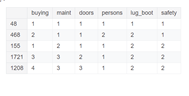


In [15]:
#Initialize the OrdinalEncoder
encoder = ce.OrdinalEncoder(cols=X_train.columns)

#Fit and transform X_train
X_train_encoded = encoder.fit_transform(X_train)

# Transform X_test
X_test_encoded = encoder.transform(X_test)

print("\nTop 5 Rows of Encoded Training Data:")
print(X_train_encoded.head())


Top 5 Rows of Encoded Training Data:
      buying  maint  doors  persons  lug_boot  safety
1178       1      1      1        1         1       1
585        2      2      2        2         2       2
1552       3      1      2        1         3       3
1169       1      1      1        3         1       1
1033       1      2      3        3         1       3


Now, you have training and test set ready for model building.

# ***Task: Build a Decision Tree Classifier with criterion gini index ***



In [16]:
# Initialize model with Gini Index
gini_model = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
gini_model.fit(X_train_encoded, y_train)

DecisionTreeClassifier(random_state=42)

# Task: Once the model is built,Predict the Test set results with criterion gini index

In [17]:
y_pred_gini = gini_model.predict(X_test_encoded)

# Task: Check accuracy score with criterion gini index

In [18]:
test_acc_gini = accuracy_score(y_test, y_pred_gini)
print(f"\n[Decision Tree Model with Gini] Test Set Accuracy: {test_acc_gini:.4f}")


[Decision Tree Model with Gini] Test Set Accuracy: 0.9249


# Task: Compare the train-set and test-set accuracy

In [19]:
y_train_pred_gini = gini_model.predict(X_train_encoded)
train_acc_gini = accuracy_score(y_train, y_train_pred_gini)

print(f"[Decision Tree Model with Gini] Training Set Accuracy: {train_acc_gini:.4f}")
print(f"[Decision Tree Model with Gini] Test Set Accuracy: {test_acc_gini:.4f}")

[Decision Tree Model with Gini] Training Set Accuracy: 1.0000
[Decision Tree Model with Gini] Test Set Accuracy: 0.9249


# Task: Report your findings. Is there any overfitting or underfitting?

In [20]:
# Print Confusion Matrix
print("\n[Decision Tree Model with Gini] Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_gini),
                   index=gini_model.classes_, columns=gini_model.classes_))


[Decision Tree Model with Gini] Confusion Matrix:
       acc  good  unacc  vgood
acc     95     6     10      7
good     1    15      1      2
unacc    6     0    352      0
vgood    3     3      0     18


In [21]:
print("\n FINDINGS : Overfitting or underfitting? ")
if train_acc_gini > test_acc_gini and (train_acc_gini - test_acc_gini) > 0.02: # calculation for significant difference
    print("The model shows signs of overfitting.")
    print("Training accuracy is very high, close to 1.0, while test accuracy is lower.")
else:
    print("The training and test accuracies are close, it is well trained.")


 FINDINGS : Overfitting or underfitting? 
The model shows signs of overfitting.
Training accuracy is very high, close to 1.0, while test accuracy is lower.


# Extra (Optional): Visualize the Decision Tree (You can explore sklearn library and graphviz library for that)[link text](https://)

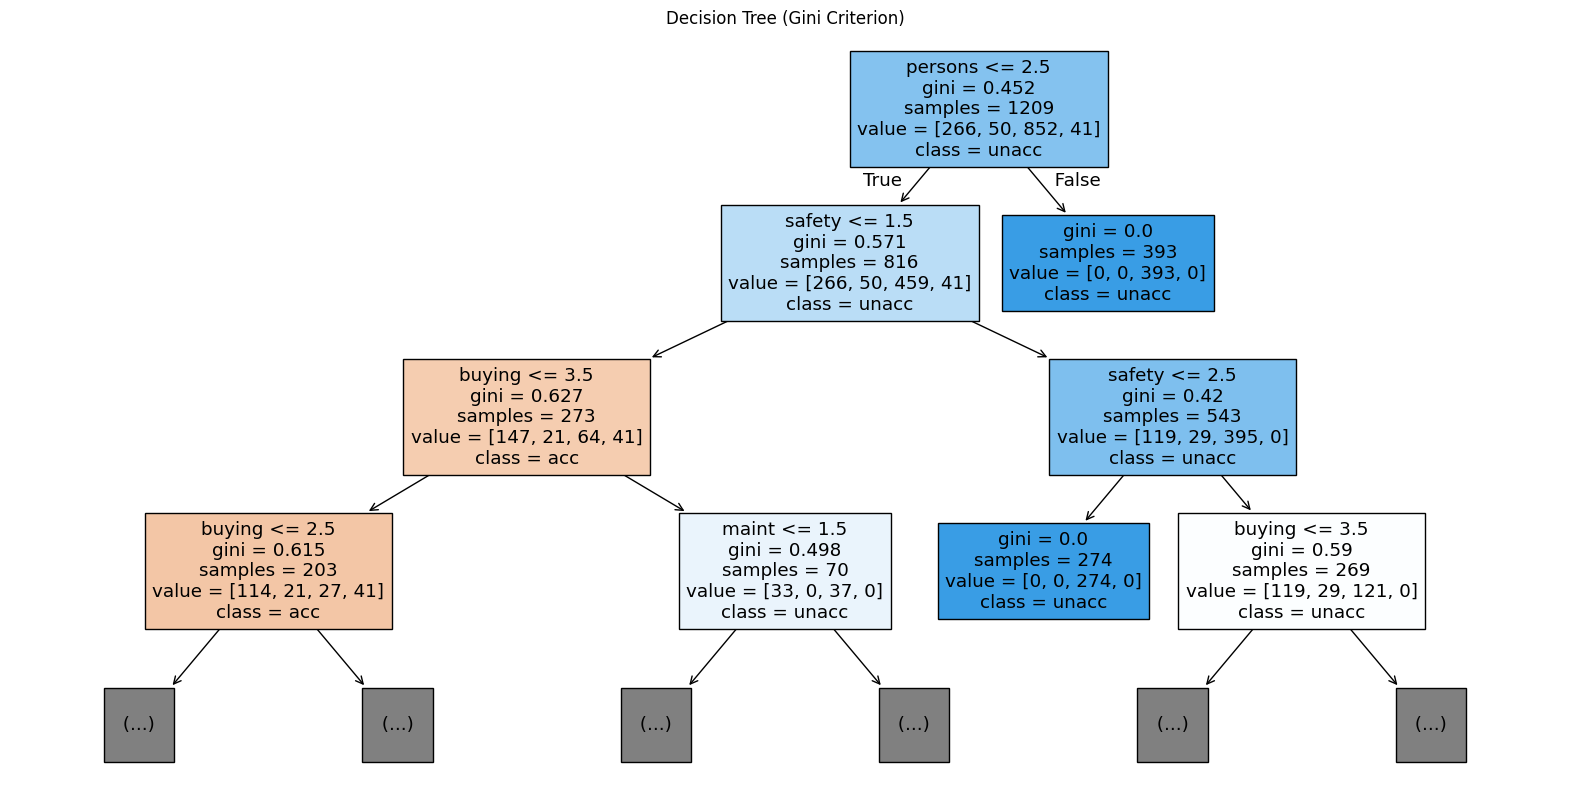

In [22]:
plt.figure(figsize=(20,10))
tree.plot_tree(gini_model, feature_names=X_train.columns.tolist(),
              class_names=gini_model.classes_.tolist(), filled=True
               , max_depth= 3)
plt.title("Decision Tree (Gini Criterion)")
plt.show()

# Task:(Extra Bonus), Build teh classifier using the criteria "Entropy"

In [23]:
# Initialize model with Entropy
entropy_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
entropy_model.fit(X_train_encoded, y_train)

# Predict Test set
y_pred_entropy = entropy_model.predict(X_test_encoded)
test_acc_entropy = accuracy_score(y_test, y_pred_entropy)

# Compare the train-set and test-set accuracy (Entropy)
y_train_pred_entropy = entropy_model.predict(X_train_encoded)
train_acc_entropy = accuracy_score(y_train, y_train_pred_entropy)

print(f"[Decision Tree Model with Entropy] Training Set Accuracy: {train_acc_entropy:.4f}")
print(f"[Decision Tree Model with Entropy] Test Set Accuracy: {test_acc_entropy:.4f}")

[Decision Tree Model with Entropy] Training Set Accuracy: 1.0000
[Decision Tree Model with Entropy] Test Set Accuracy: 0.9480


In [24]:
print(f"[Decision Tree model with Gini Index] :{train_acc_gini:.4f}| {test_acc_gini:.4f}")
print(f"[Decision Tree model with Entropy Index] :{train_acc_entropy:.4f}| {test_acc_entropy:.4f}")

[Decision Tree model with Gini Index] :1.0000| 0.9249
[Decision Tree model with Entropy Index] :1.0000| 0.9480


Comparing the accuracy score of the Gini index and Entropy index, Entropy index accuracy is higher than  Gini index on the test set prediction, although not much difference. Both models show sign of overfitting with accuracy score of 1 on training set.
